<a href="https://colab.research.google.com/github/suuuuwimmer/study/blob/master/9_3_LSTM%EA%B3%BC_GRU_%EC%85%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)


In [6]:
from keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [7]:
import keras
model_lstm = keras.Sequential()
model_lstm.add(keras.layers.Input(shape=(100,)))
model_lstm.add(keras.layers.Embedding(500, 16))
model_lstm.add(keras.layers.LSTM(8))
model_lstm.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_lstm.fit(train_seq, train_target, epochs=20, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.6212 - loss: 0.6444 - val_accuracy: 0.7086 - val_loss: 0.5642
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.7748 - loss: 0.4803 - val_accuracy: 0.7884 - val_loss: 0.4626
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.7982 - loss: 0.4388 - val_accuracy: 0.7962 - val_loss: 0.4498
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8026 - loss: 0.4261 - val_accuracy: 0.7966 - val_loss: 0.4326
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.8090 - loss: 0.4160 - val_accuracy: 0.7914 - val_loss: 0.4466
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.8049 - loss: 0.4136 - val_accuracy: 0.7908 - val_loss: 0.4423
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.8179 - loss: 0.3984 - val_accuracy: 0.8058 - val_loss: 0.4226
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8149 - loss: 0.3957 - 

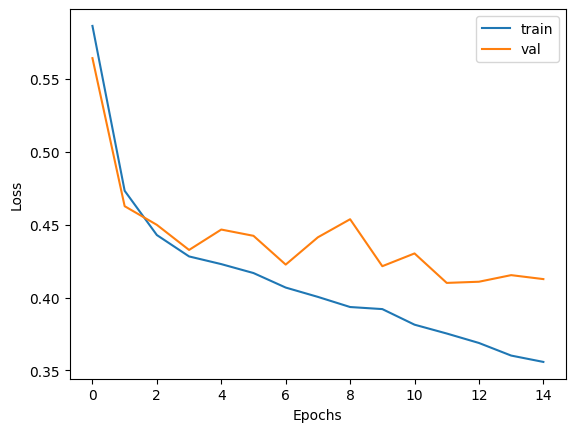

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
model_dropout = keras.Sequential()
model_dropout.add(keras.layers.Input(shape=(100,)))
model_dropout.add(keras.layers.Embedding(500, 16))
model_dropout.add(keras.layers.LSTM(8, dropout=0.2))
model_dropout.add(keras.layers.Dense(1, activation='sigmoid'))

In [12]:
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.keras',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_dropout.fit(train_seq, train_target, epochs=20, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.6086 - loss: 0.6537 - val_accuracy: 0.7726 - val_loss: 0.4859
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 83ms/step - accuracy: 0.7820 - loss: 0.4753 - val_accuracy: 0.7906 - val_loss: 0.4514
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 70ms/step - accuracy: 0.7996 - loss: 0.4355 - val_accuracy: 0.8010 - val_loss: 0.4327
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.8026 - loss: 0.4279 - val_accuracy: 0.7990 - val_loss: 0.4344
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.8034 - loss: 0.4227 - val_accuracy: 0.8038 - val_loss: 0.4263
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.8097 - loss: 0.4126 - val_accuracy: 0.7990 - val_loss: 0.4302
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.8113 - loss: 0.4110 - val_accuracy: 0.8010 - val_loss: 0.4291
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.8175 - loss: 0.3987 - 

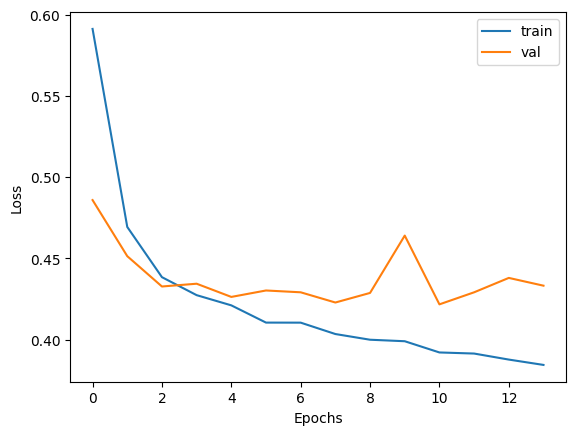

In [13]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model_2lstm = keras.Sequential()
model_2lstm.add(keras.layers.Input(shape=(100,)))
model_2lstm.add(keras.layers.Embedding(500, 16))
model_2lstm.add(keras.layers.LSTM(8,dropout=0.2, return_sequences=True))
model_2lstm.add(keras.layers.LSTM(8, dropout=0.2))
model_2lstm.add(keras.layers.Dense(1, activation='sigmoid'))

In [18]:
model_2lstm.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 8)         │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)